In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/celebrity-face-image-dataset/Celebrity Faces Dataset/Angelina Jolie/049_4d6df392.jpg
/kaggle/input/celebrity-face-image-dataset/Celebrity Faces Dataset/Angelina Jolie/051_268fdfd7.jpg
/kaggle/input/celebrity-face-image-dataset/Celebrity Faces Dataset/Angelina Jolie/045_c560251e.jpg
/kaggle/input/celebrity-face-image-dataset/Celebrity Faces Dataset/Angelina Jolie/052_6db5f5bf.jpg
/kaggle/input/celebrity-face-image-dataset/Celebrity Faces Dataset/Angelina Jolie/006_9135205d.jpg
/kaggle/input/celebrity-face-image-dataset/Celebrity Faces Dataset/Angelina Jolie/020_4c4b655f.jpg
/kaggle/input/celebrity-face-image-dataset/Celebrity Faces Dataset/Angelina Jolie/025_41cee764.jpg
/kaggle/input/celebrity-face-image-dataset/Celebrity Faces Dataset/Angelina Jolie/024_ca32be97.jpg
/kaggle/input/celebrity-face-image-dataset/Celebrity Faces Dataset/Angelina Jolie/092_26130bb1.jpg
/kaggle/input/celebrity-face-image-dataset/Celebrity Faces Dataset/Angelina Jolie/066_b378479b.jpg
/kaggle/in

In [2]:
import torch
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torchvision.transforms as transforms
import torch.nn.functional as F
import torch.optim as optim
import cv2
import os
import numpy as np
from sklearn.preprocessing import LabelEncoder
from PIL import Image
from torch.utils.data import random_split
from torchvision import models, transforms, datasets
from torch.optim import lr_scheduler

In [3]:
dataset_dir = '/kaggle/input/celebrity-face-image-dataset'

In [4]:
import os
import glob

data_path = '/kaggle/input/celebrity-face-image-dataset'

image_paths = []

# Traverse through each directory in the data path
for root, dirs, files in os.walk(data_path):
    for file in files:
        if file.lower().endswith(('.png', '.jpg', '.jpeg')):
            image_path = os.path.join(root, file)
            image_paths.append(image_path)

i = 0
for path in image_paths:
    print(path)
    i+=1
    if i == 5:
        break

/kaggle/input/celebrity-face-image-dataset/Celebrity Faces Dataset/Angelina Jolie/049_4d6df392.jpg
/kaggle/input/celebrity-face-image-dataset/Celebrity Faces Dataset/Angelina Jolie/051_268fdfd7.jpg
/kaggle/input/celebrity-face-image-dataset/Celebrity Faces Dataset/Angelina Jolie/045_c560251e.jpg
/kaggle/input/celebrity-face-image-dataset/Celebrity Faces Dataset/Angelina Jolie/052_6db5f5bf.jpg
/kaggle/input/celebrity-face-image-dataset/Celebrity Faces Dataset/Angelina Jolie/006_9135205d.jpg


In [5]:
import os
import pandas as pd

def create_image_label_csv(input_dir, output_csv):
    data = []
    
    # Iterate over the directories within the input directory
    for class_name in os.listdir(input_dir):
        class_dir = os.path.join(input_dir, class_name)
        if os.path.isdir(class_dir):
            # Iterate over the images within the directory
            for filename in os.listdir(class_dir):
                image_path = os.path.join(class_dir, filename)
                if os.path.isfile(image_path):
                    # Append the image path and label to the data list
                    data.append([image_path, class_name])
    
    # Create a DataFrame from the data list
    df = pd.DataFrame(data, columns=['image_path', 'label'])
    
    # Save the DataFrame to a CSV file
    df.to_csv(output_csv, index=False)

# Define the path to the directory containing subdirectories of images
input_dir = "/kaggle/input/celebrity-face-image-dataset/Celebrity Faces Dataset"

# Define the path for the output CSV file
output_csv = "/kaggle/working/image_labels.csv"

# Create the CSV file with image paths and labels
create_image_label_csv(input_dir, output_csv)

print(f"CSV file created at {output_csv}")


CSV file created at /kaggle/working/image_labels.csv


In [7]:
import pandas as pd
df = pd.read_csv('/kaggle/working/image_labels.csv')
df.head()

,image_path,label
0,/kaggle/input/celebrity-face-image-dataset/Cel...,Angelina Jolie
1,/kaggle/input/celebrity-face-image-dataset/Cel...,Angelina Jolie
2,/kaggle/input/celebrity-face-image-dataset/Cel...,Angelina Jolie
3,/kaggle/input/celebrity-face-image-dataset/Cel...,Angelina Jolie
4,/kaggle/input/celebrity-face-image-dataset/Cel...,Angelina Jolie


In [9]:

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df['encoded_label'] = label_encoder.fit_transform(df['label'])

df.to_csv('path_to_your_encoded_file.csv', index=False)
df.drop(columns=['label'], inplace=True)
df.head()

,image_path,encoded_label
0,/kaggle/input/celebrity-face-image-dataset/Cel...,0
1,/kaggle/input/celebrity-face-image-dataset/Cel...,0
2,/kaggle/input/celebrity-face-image-dataset/Cel...,0
3,/kaggle/input/celebrity-face-image-dataset/Cel...,0
4,/kaggle/input/celebrity-face-image-dataset/Cel...,0


In [10]:
import os

data_path = '/kaggle/input/celebrity-face-image-dataset'

for root, dirs, files in os.walk(data_path):
    num_images = sum(1 for file in files if file.lower().endswith(('.png', '.jpg', '.jpeg')))
    print(f"Directory: {root}, Number of Images: {num_images}")


Directory: /kaggle/input/celebrity-face-image-dataset, Number of Images: 0
Directory: /kaggle/input/celebrity-face-image-dataset/Celebrity Faces Dataset, Number of Images: 0
Directory: /kaggle/input/celebrity-face-image-dataset/Celebrity Faces Dataset/Angelina Jolie, Number of Images: 100
Directory: /kaggle/input/celebrity-face-image-dataset/Celebrity Faces Dataset/Sandra Bullock, Number of Images: 100
Directory: /kaggle/input/celebrity-face-image-dataset/Celebrity Faces Dataset/Nicole Kidman, Number of Images: 100
Directory: /kaggle/input/celebrity-face-image-dataset/Celebrity Faces Dataset/Megan Fox, Number of Images: 100
Directory: /kaggle/input/celebrity-face-image-dataset/Celebrity Faces Dataset/Johnny Depp, Number of Images: 100
Directory: /kaggle/input/celebrity-face-image-dataset/Celebrity Faces Dataset/Natalie Portman, Number of Images: 100
Directory: /kaggle/input/celebrity-face-image-dataset/Celebrity Faces Dataset/Tom Cruise, Number of Images: 100
Directory: /kaggle/input/c

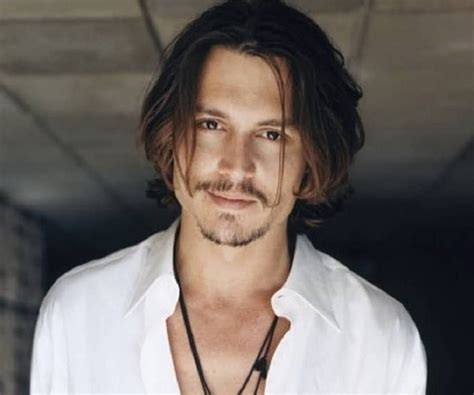

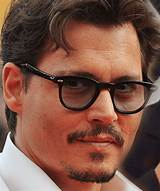

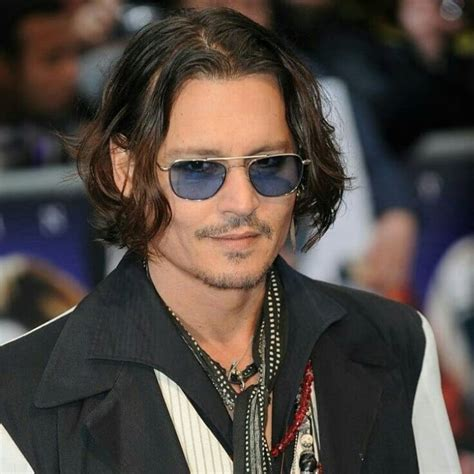

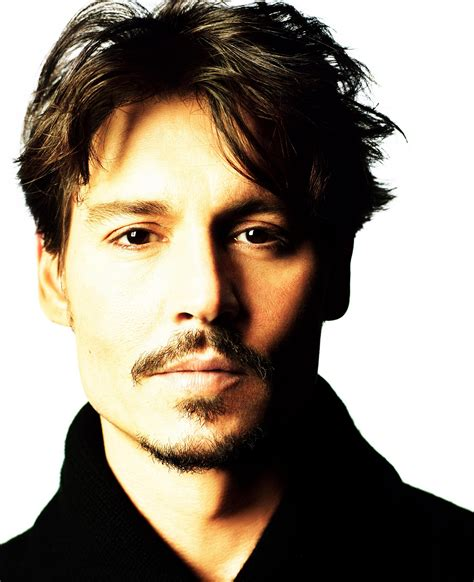

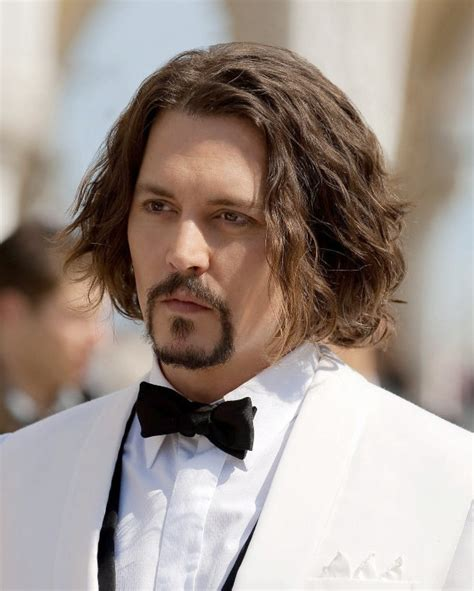

In [16]:
import pandas as pd
import random
from IPython.display import Image

#/kaggle/input/ear-dataset-for-100-person/images/images/000/000_back_ear.jpg
# Concatenate the directory path with the image name
image_paths = [f"{fname}" for person_id, fname in zip(df["encoded_label"], df["image_path"])]


# Visualize the images
for path in image_paths[400:405]:
    display(Image(filename=path))

In [17]:
import os
from PIL import Image
import torchvision.transforms as transforms
import torch

# Define the directory paths
input_dir = "/kaggle/input/celebrity-face-image-dataset/Celebrity Faces Dataset"
output_dir = "/kaggle/working/output/augmented_images"

# Create the output directory if it doesn't exist
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Define the transformations to apply
transform = transforms.Compose([
    transforms.RandomRotation(degrees=15),  # Random rotation
    transforms.RandomHorizontalFlip(p=0.5),  # Random horizontal flip
    transforms.RandomVerticalFlip(p=0.5),  # Random vertical flip
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),  # Color jitter
    transforms.RandomResizedCrop(size=224, scale=(0.8, 1.0)),  # Random resized crop
    transforms.RandomAffine(degrees=15, translate=(0.1, 0.1), scale=(0.8, 1.2), shear=15),  # Random affine transformation
    transforms.RandomPerspective(distortion_scale=0.2, p=0.5),  # Random perspective transformation
    transforms.RandomGrayscale(p=0.1),  # Random grayscale
    transforms.GaussianBlur(kernel_size=3),  # Gaussian blur
    transforms.RandomErasing(p=0.5, scale=(0.02, 0.2), ratio=(0.3, 3.3))  # Random erasing
])

# Recursively search for image files within the input directory and its subdirectories
for root, dirs, files in os.walk(input_dir):
    # Get the relative path from the input directory
    rel_path = os.path.relpath(root, input_dir)
    output_subdir = os.path.join(output_dir, rel_path)
    
    # Create the corresponding subdirectory in the output directory
    if not os.path.exists(output_subdir):
        os.makedirs(output_subdir)
    
    for filename in files:
        # Check if the file is an image with a supported extension
        if filename.endswith(('.jpg', '.jpeg', '.png')):
            # Load the image
            image_path = os.path.join(root, filename)
            image = Image.open(image_path)
            # Convert PIL image to PyTorch tensor
            tensor_image = transforms.ToTensor()(image)
            # Apply transformations and save the augmented images
            for i in range(5):
                transformed_tensor = transform(tensor_image)
                transformed_image = transforms.ToPILImage()(transformed_tensor)
                output_filename = f"{filename[:-4]}_{i}.jpg"  # Append index to filename
                output_path = os.path.join(output_subdir, output_filename)
                transformed_image.save(output_path)

print("Augmentation completed successfully.")


/opt/conda/lib/python3.10/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


Augmentation completed successfully.


In [18]:
dataset_dir = '/kaggle/working/output/augmented_images'

In [19]:
total_image_count = 0  # Initialize total image count

# Iterate over each user directory
for user_dir in os.listdir(dataset_dir):
    user_dir_path = os.path.join(dataset_dir, user_dir)
    if os.path.isdir(user_dir_path):
        # Count the number of image files in the user directory
        image_count = sum(1 for file in os.listdir(user_dir_path) if file.endswith('.jpg') or file.endswith('.png'))  # Adjust file extension filtering as needed
        print(f"Directory: {user_dir}, Image Count: {image_count}")
        total_image_count += image_count

print(f"Total Number of Images: {total_image_count}")

Directory: Hugh Jackman, Image Count: 500
Directory: Will Smith, Image Count: 500
Directory: Johnny Depp, Image Count: 500
Directory: Leonardo DiCaprio, Image Count: 500
Directory: Megan Fox, Image Count: 500
Directory: Robert Downey Jr, Image Count: 500
Directory: Denzel Washington, Image Count: 500
Directory: Kate Winslet, Image Count: 500
Directory: Tom Cruise, Image Count: 500
Directory: Angelina Jolie, Image Count: 500
Directory: Brad Pitt, Image Count: 500
Directory: Tom Hanks, Image Count: 500
Directory: Sandra Bullock, Image Count: 500
Directory: Nicole Kidman, Image Count: 500
Directory: Jennifer Lawrence, Image Count: 500
Directory: Scarlett Johansson, Image Count: 1000
Directory: Natalie Portman, Image Count: 500
Total Number of Images: 9000


In [20]:
numClasses=17
image_Shape=(224,224)

In [24]:
from PIL import Image
import os
from torch.utils.data import Dataset
import torchvision.transforms as transforms

class MakeDataset(Dataset):
    def __init__(self, root_folder, transform=None):
        self.root_folder = root_folder
        self.transform = transform
        self.classes = sorted(os.listdir(root_folder))  # Sort alphabetically
        self.class_to_idx = {cls: i for i, cls in enumerate(self.classes)}
        self.images = self.make_dataset()

    def make_dataset(self):
        images = []
        for label in self.classes:
            label_folder = os.path.join(self.root_folder, label)
            for image_name in os.listdir(label_folder):
                image_path = os.path.join(label_folder, image_name)
                item = (image_path, self.class_to_idx[label])
                images.append(item)
        return images

    def __len__(self):
        return len(self.images)

    def __getitem__(self, index):
        image_path, label = self.images[index]
        image = Image.open(image_path).convert("RGB")

        if self.transform:
            image = self.transform(image)

        return image, label

In [25]:
#So, the overall transformation pipeline converts input images to PyTorch tensors and
#resizes them to a specified shape (image_Shape). This pipeline is commonly used for preprocessing images in PyTorch-based deep learning pipelines.
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

In [26]:
dataset = MakeDataset(dataset_dir, transform=transform)

In [27]:
# Calculate train size as 2/3 of the dataset
train_size = int(2 * len(dataset) / 3)

# Calculate validation size as remaining 1/3
val_size = len(dataset) - train_size

# Perform the random split
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

In [28]:
print(len(train_dataset))
print(len(val_dataset))

6000
3000


In [29]:
batch_size = 16

In [31]:
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

Training Samples:


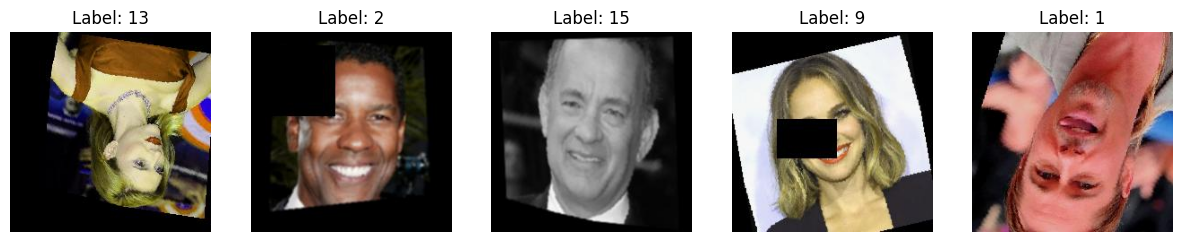

Validation Samples:


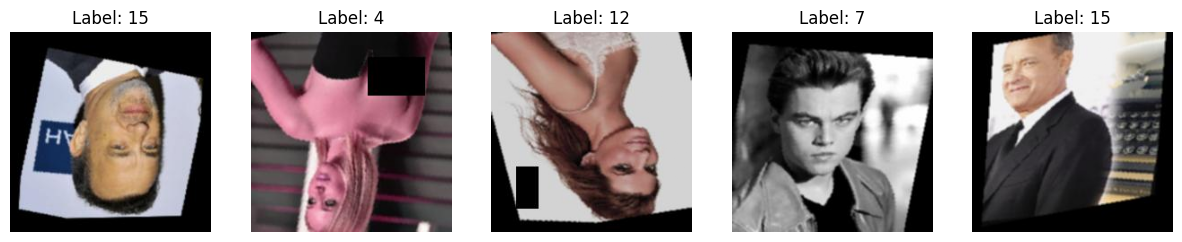

In [32]:
import matplotlib.pyplot as plt
import numpy as np

# Define a function to visualize images from a DataLoader
def visualize(loader, num_samples=5):
    # Iterate through the DataLoader to get a batch of data
    for batch_idx, (images, labels) in enumerate(loader):
        # Plot the images
        fig, axes = plt.subplots(1, num_samples, figsize=(15, 3))
        for i in range(num_samples):
            ax = axes[i]
            ax.imshow(np.transpose(images[i], (1, 2, 0)))
            ax.set_title(f"Label: {labels[i]}")
            ax.axis('off')
        plt.show()
        break  # Stop after displaying the first batch

# Visualize samples from the training loader
print("Training Samples:")
visualize(train_loader)

# Visualize samples from the validation loader
print("Validation Samples:")
visualize(val_loader)

In [45]:
#When pretrained=True, the ResNet-50 model will be initialized with weights that have been pre-trained on 
#the ImageNet dataset
model = models.efficientnet_b7(pretrained=True)
last_layer = list(model.classifier.children())[-1]


# Replace it with the correct attribute name
if isinstance(last_layer, nn.Linear):
    in_features = last_layer.in_features
    model.classifier[-1] = nn.Linear(in_features, numClasses)
else:
    raise ValueError("The last layer of the classifier is not Linear, please adjust the code accordingly.")




"""# Load the pretrained VGG16 model
model = models.vgg19(pretrained=True)

#In VGG16, the classifier is defined as a sequence of layers, where the last layer is a fully connected (linear) layer.
#By accessing model.classifier[6], you are retrieving the last layer in the classifier.
num_features = model.classifier[6].in_features
model.classifier[6] = nn.Linear(num_features, numClasses)"""


/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_B7_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_B7_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/efficientnet_b7_lukemelas-c5b4e57e.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b7_lukemelas-c5b4e57e.pth
100%|██████████| 255M/255M [00:03<00:00, 87.4MB/s] 


'# Load the pretrained VGG16 model\nmodel = models.vgg19(pretrained=True)\n\n#In VGG16, the classifier is defined as a sequence of layers, where the last layer is a fully connected (linear) layer.\n#By accessing model.classifier[6], you are retrieving the last layer in the classifier.\nnum_features = model.classifier[6].in_features\nmodel.classifier[6] = nn.Linear(num_features, numClasses)'

In [46]:
# Define the loss function
criterion = nn.CrossEntropyLoss()

# Define the optimizer
optimizer = optim.Adam(model.parameters(), lr=0.0001)

#In summary, this scheduler decreases the learning rate by a factor of 0.1 every 7 epochs. 
#This is a common technique used in training deep learning models to help stabilize training and improve convergence.
scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

In [47]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [48]:
torch.cuda.empty_cache()

In [49]:
model = model.to(device)

In [50]:
num_epochs = 20
desired_training_accuracy = 99.999
early_stopping_threshold = 5
early_stopping_counter = 0
best_val_loss = float('inf')

In [51]:
# Lists to store training and validation metrics for plotting curves
train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []
predictions = []
targets = []

In [52]:
import time

start_time = time.time()

In [53]:
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0

    for i, (inputs, labels) in enumerate(train_loader):
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

        _, predicted_train = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted_train == labels).sum().item()

        # Print training loss and accuracy every 100 batches
        if i % 100 == 99:
            print(f'Epoch {epoch + 1}/{num_epochs}, Batch {i + 1}/{len(train_loader)}, '
                  f'Training Loss: {running_loss / 100}, Training Accuracy: {100 * correct_train / total_train}%')
            running_loss = 0.0

    # Calculate training accuracy after the epoch
    training_accuracy = correct_train / total_train

    # Validation
    model.eval()
    correct_val = 0
    total_val = 0
    val_running_loss = 0.0

    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_running_loss += loss.item()

            _, predicted_val = torch.max(outputs.data, 1)
            total_val += labels.size(0)
            correct_val += (predicted_val == labels).sum().item()

            # Append predictions and targets for confusion matrix
            predictions.append(predicted_val.cpu().numpy())
            targets.append(labels.cpu().numpy())
    # done here
    # Calculate validation accuracy after the epoch
    validation_accuracy = correct_val / total_val
    average_val_loss = val_running_loss / len(val_loader)
    
    print(f'Epoch {epoch + 1}/{num_epochs}, '
          f'Training Loss: {running_loss / len(train_loader)}, '
          f'Training Accuracy: {100 * training_accuracy}%, '
          f'Validation Loss: {average_val_loss}, '
          f'Validation Accuracy: {100 * validation_accuracy}%')

    # Append training and validation metrics for plotting
    train_losses.append(running_loss / len(train_loader))
    train_accuracies.append(training_accuracy)
    val_losses.append(average_val_loss)
    val_accuracies.append(validation_accuracy)

    scheduler.step()
    
     # Early stopping based on validation loss
    if average_val_loss < best_val_loss:
        best_val_loss = average_val_loss
        early_stopping_counter = 0
    else:
        early_stopping_counter += 1

    if early_stopping_counter >= early_stopping_threshold:
        print(f'Early stopping: No improvement in validation loss for {early_stopping_threshold} epochs.')
        break

Epoch 1/20, Batch 100/375, Training Loss: 2.7307550501823425, Training Accuracy: 14.125%
Epoch 1/20, Batch 200/375, Training Loss: 2.087159478664398, Training Accuracy: 24.53125%
Epoch 1/20, Batch 300/375, Training Loss: 1.5499367570877076, Training Accuracy: 32.666666666666664%
Epoch 1/20, Training Loss: 0.24193288946151734, Training Accuracy: 38.43333333333334%, Validation Loss: 0.9143077694672219, Validation Accuracy: 71.86666666666667%
Epoch 2/20, Batch 100/375, Training Loss: 0.6854612392187118, Training Accuracy: 80.8125%
Epoch 2/20, Batch 200/375, Training Loss: 0.6108846262097358, Training Accuracy: 80.59375%
Epoch 2/20, Batch 300/375, Training Loss: 0.5935023152828216, Training Accuracy: 81.14583333333333%
Epoch 2/20, Training Loss: 0.11462951592604319, Training Accuracy: 81.25%, Validation Loss: 0.5463253795862832, Validation Accuracy: 82.46666666666667%
Epoch 3/20, Batch 100/375, Training Loss: 0.1865928372181952, Training Accuracy: 95.6875%
Epoch 3/20, Batch 200/375, Traini

In [54]:
end_time = time.time()

duration_seconds = end_time - start_time
duration_minutes = duration_seconds / 60

print("Training duration: {:.2f} minutes".format(duration_minutes))

Training duration: 61.42 minutes


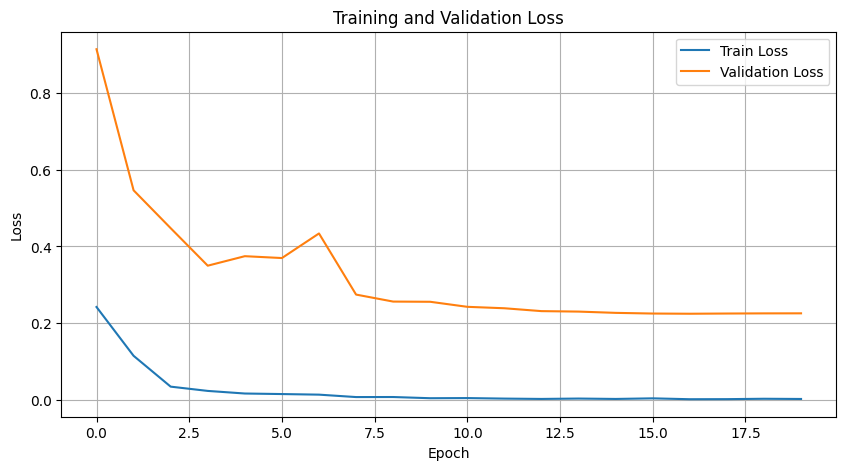

In [55]:
# Plotting training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

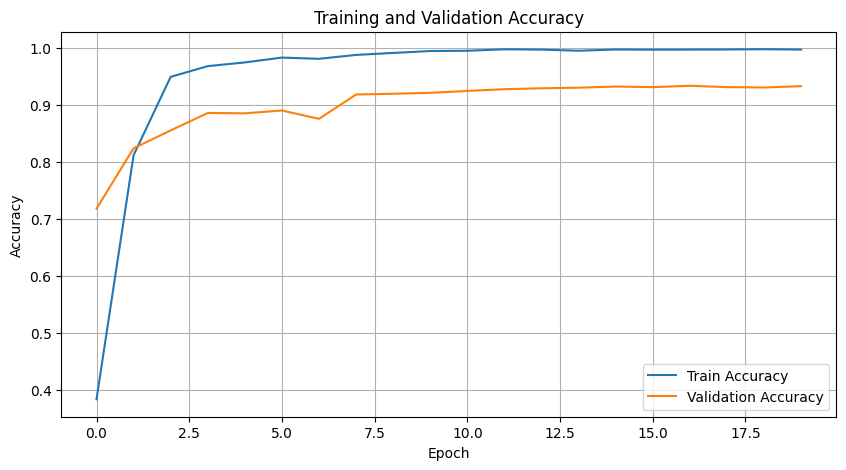

In [56]:
# Plotting training and validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()